# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 55

Group Members:
- Wilson Yusda (13522019)
- Filbert (13522021)
- Farel Winalda (13522047)
- Benardo (13522055)

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from scipy.spatial.distance import cdist


## Import Dataset

In [4]:
basic_features = pd.read_csv('basic_features_train.csv')
additional_features = pd.read_csv('additional_features_train.csv')
content_features =pd.read_csv('content_features_train.csv')
flow_features = pd.read_csv('flow_features_train.csv')
labels = pd.read_csv('labels_train.csv')
time_features = pd.read_csv('time_features_train.csv')

In [5]:
basic_features_test = pd.read_csv('basic_features_test.csv')
additional_features_test = pd.read_csv('additional_features_test.csv')
content_features_test =pd.read_csv('content_features_test.csv')
flow_features_test = pd.read_csv('flow_features_test.csv')
time_features_test = pd.read_csv('time_features_test.csv')

In [6]:
dataframes = [basic_features, additional_features, content_features, flow_features, labels, time_features]
common_columns = set(dataframes[0].columns)
for df in dataframes[1:]:
    common_columns.intersection_update(df.columns)
print("Common columns across all DataFrames:", common_columns)
dataframes = [basic_features, additional_features, content_features, flow_features, labels, time_features]
common_columns = set(dataframes[0].columns)
for df in dataframes[1:]:
    common_columns.intersection_update(df.columns)
print("Common columns across all DataFrames:", common_columns)

Common columns across all DataFrames: {'id'}
Common columns across all DataFrames: {'id'}


In [7]:
dataframes_test = [basic_features_test, additional_features_test, content_features_test, flow_features_test,time_features_test]
common_columns = set(dataframes_test[0].columns)
for df in dataframes_test[1:]:
    common_columns.intersection_update(df.columns)
print("Common columns across all dataframes_test:", common_columns)
dataframes_test = [basic_features_test, additional_features_test, content_features_test, flow_features_test,time_features_test]
common_columns = set(dataframes_test[0].columns)
for df in dataframes_test[1:]:
    common_columns.intersection_update(df.columns)
print("Common columns across all dataframes_test:", common_columns)

Common columns across all dataframes_test: {'id'}
Common columns across all dataframes_test: {'id'}


In [8]:
train = dataframes[0]
for df in dataframes[1:]:
    train = pd.merge(train, df, on='id', how='inner')

In [9]:
test = dataframes_test[0]
for df in dataframes_test[1:]:
    test = pd.merge(test, df, on='id', how='inner')

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [10]:
trainnew = train.drop(columns=['label'])
data_train, data_val = train_test_split(
    trainnew,
    test_size=0.2,  
    stratify=trainnew['attack_cat'], 
    random_state=42  
)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [11]:
def check_missing_values(dataframe: pd.DataFrame):
    missing_info = dataframe.isnull().sum()
    dtypes = dataframe.dtypes
    result = pd.DataFrame({
        'Missing Values': missing_info,
        'Data Type': dtypes
    })
    print(result)

In [12]:
def count_unique_categorical_values(df: pd.DataFrame):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    unique_counts = {col: df[col].nunique() for col in categorical_cols}
    return unique_counts

In [13]:
class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self, max_iter=1000, random_state=42):
        self.max_iter = max_iter
        self.random_state = random_state
        self.numerical_imputer = IterativeImputer(random_state=self.random_state, max_iter=self.max_iter)

    def fit(self, X, y=None):
        self.numerical_cols = X.select_dtypes(include=["number"]).columns
        self.numerical_cols = self.numerical_cols[self.numerical_cols != "attack_cat"]
        self.categorical_cols = X.select_dtypes(include=["object", "category"]).columns
        self.categorical_cols = self.categorical_cols[self.categorical_cols != "attack_cat"]
        if len(self.numerical_cols) > 0:
            self.numerical_imputer.fit(X[self.numerical_cols])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if len(self.numerical_cols) > 0:
            X_transformed[self.numerical_cols] = self.numerical_imputer.transform(X[self.numerical_cols])
        if len(self.categorical_cols) > 0:
            for col in self.categorical_cols:
                if col in X_transformed.columns:
                    most_frequent_value = X_transformed[col].mode()[0]
                    X_transformed[col].fillna(most_frequent_value, inplace=True)

        return X_transformed

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [14]:
def handle_duplicates(df: pd.DataFrame, subset: list = None) -> pd.DataFrame:
    duplicates = df[df.duplicated(subset=subset, keep=False)]
    print("Duplicates found:")
    print(duplicates)
    df_no_duplicates = df.drop_duplicates(subset=subset, keep='first')
    return df_no_duplicates

In [15]:
handle_duplicates(data_train)

Duplicates found:
Empty DataFrame
Columns: [state, dur, sbytes, dbytes, sttl, dttl, sloss, dloss, service, sload, dload, spkts, dpkts, id, is_sm_ips_ports, ct_state_ttl, ct_flw_http_mthd, is_ftp_login, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len, proto, attack_cat, sjit, djit, sinpkt, dinpkt, tcprtt, synack, ackdat]
Index: []

[0 rows x 43 columns]


,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,...,response_body_len,proto,attack_cat,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
169184,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,...,0.0,udp,Generic,0.000000,0.000000,0.009000,0.00000,0.000000,0.000000,0.000000
43790,INT,0.000007,86.0,NaN,254.0,0.0,0.0,0.0,-,4.914286e+07,...,0.0,ipv6,DoS,0.000000,0.000000,0.007000,0.00000,0.000000,0.000000,0.000000
169830,INT,0.000004,114.0,0.0,254.0,0.0,0.0,0.0,dns,1.140000e+08,...,0.0,udp,Generic,0.000000,0.000000,0.004000,0.00000,0.000000,0.000000,0.000000
139375,FIN,0.879989,17786.0,918.0,254.0,252.0,8.0,2.0,-,1.543474e+05,...,0.0,tcp,Fuzzers,3968.707060,103.353242,40.403667,71.81182,0.110078,0.090054,0.020024
75510,INT,0.000003,114.0,0.0,254.0,0.0,0.0,0.0,dns,1.520000e+08,...,0.0,udp,Generic,0.000000,0.000000,0.003000,0.00000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,INT,0.000003,114.0,0.0,254.0,0.0,0.0,0.0,NaN,1.520000e+08,...,0.0,udp,Generic,0.000000,0.000000,0.003000,0.00000,NaN,0.000000,0.000000
158781,REQ,0.621469,1088.0,0.0,254.0,0.0,0.0,0.0,-,1.050414e+04,...,0.0,ospf,Exploits,407.624813,0.000000,391.360000,0.00000,0.000000,0.000000,0.000000
127193,FIN,0.698788,762.0,1172.0,62.0,252.0,2.0,2.0,http,7.853598e+03,...,0.0,tcp,Exploits,4062.472536,111.438625,77.643111,78.27500,0.165928,0.095177,0.070751
114751,INT,0.000004,200.0,0.0,254.0,0.0,0.0,0.0,NaN,2.000000e+08,...,0.0,trunk-1,Analysis,0.000000,0.000000,0.004000,NaN,0.000000,0.000000,0.000000


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [16]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.features_to_drop = set()

    def fit(self, X, y=None):
        numeric_X = X.select_dtypes(include=[np.number])
        correlation_matrix = numeric_X.corr()
        high_correlation_mask = correlation_matrix >= 0.75
        highly_correlated_features = []
        for feature in high_correlation_mask.columns:
            correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
            for correlated_feature in correlated_with:
                if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
                    highly_correlated_features.append((feature, correlated_feature))
        for feature1, feature2 in highly_correlated_features:
            if feature1 not in self.features_to_drop and feature2 not in self.features_to_drop:
                self.features_to_drop.add(feature2)
        print("Features to drop identified during fit:", self.features_to_drop)
        return self

    def transform(self, X):
        X = X.drop(columns=self.features_to_drop, errors="ignore")
        additional_features_to_drop = ["id", "state", "service"]
        X = X.drop(columns=additional_features_to_drop, errors="ignore")
        return X

In [17]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        data = X.copy()
        valid_protocols = ['tcp', 'udp', 'unas', 'arp', 'ospf']
        data['proto_transformed'] = data['proto'].apply(lambda x: x if x in valid_protocols else 'others')
        data= data.drop(['proto_transformed_udp','proto_transformed_unas','proto_transformed_ospf','proto_transformed_tcp','proto_transformed_arp','proto'], axis=1, errors="ignore")
        # Ratios
        data['byte_ratio'] = data['sbytes'] / (data['dbytes'] + 1)
        data['pkt_ratio'] = data['spkts'] / (data['dpkts'] + 1)
        data['load_ratio'] = data['sload'] / (data['dload'] + 1)
        data['jit_ratio'] = data['sjit'] / (data['sjit'] + 1)
        data['inter_pkt_ratio'] = data['sinpkt'] / (data['dinpkt'] + 1)
        data['tcp_setup_ratio'] = data['tcprtt'] / (data['synack'] + data['ackdat'] + 1)
        data['total_bytes'] = data['sbytes'] + data['dbytes']
        data['total_pkts'] = data['spkts'] + data['dpkts']
        data['total_load'] = data['dload'] + data['dload']
        data['total_jitter'] = data['sjit'] + data['djit']
        data['total_inter_pkt'] = data['sinpkt'] + data['dinpkt']
        data['total_tcp_setup'] = data['tcprtt'] + data['synack'] + data['ackdat']
        data['byte_pkt_interaction_src'] = data['sbytes'] * data['spkts']
        data['byte_pkt_interaction_dst'] = data['dbytes'] * data['dpkts']
        data['load_jit_interaction_src'] = data['sload'] * data['sjit']
        data['load_jit_interaction_dst'] = data['dload'] * data['djit']
        data['pkt_jit_interaction_src'] = data['spkts'] * data['sjit']
        data['pkt_jit_interaction_dst'] = data['dpkts'] * data['djit']
        data['mean_pkt_size'] = data['smean'] + data['dmean']
        data['tcp_seq_diff'] = data['stcpb'] - data['dtcpb']
        return data

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [18]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.numerical_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2 and col != "attack_cat"]
        return self
    def transform(self, X):
        for col in self.numerical_cols:
            if (X[col] <= 0).any():
                X[col] = X[col] + 1 - X[col].min()
            X[col] = np.log(X[col])
        return X

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [19]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
    def fit(self, X, y=None):
        data = X.copy()
        categorical_cols = data.select_dtypes(include=['object', 'category']).columns
        categorical_cols = categorical_cols[categorical_cols != "attack_cat"]
        self.encoder.fit(data[categorical_cols])
        return self

    def transform(self, X):
        data = X.copy()
        categorical_cols = data.select_dtypes(include=['object', 'category']).columns
        categorical_cols = categorical_cols[categorical_cols != "attack_cat"]
        encoded_data = self.encoder.transform(data[categorical_cols])
        one_hot_df = pd.DataFrame(encoded_data, columns=self.encoder.get_feature_names_out(categorical_cols))
        data_encoded = one_hot_df.astype(int)
        data_initial = X.drop(columns=categorical_cols)
        df_encoded = pd.concat([data_initial, data_encoded], axis=1)
        return df_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [20]:
#Although data are imnbalanced, most of the test case resolve around the majority. Therefore, increasing the minority could cause a slight downgrade from the result. Implementation are performed one using SMOTE, but did not turn out well

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [21]:
# Not implemented because it made the result worse

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [22]:
from sklearn.decomposition import PCA
class PCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=0.95):
        self.n_components = n_components
        self.pca = None
        self.feature_names_ = None
    def fit(self, X, y=None):
        self.pca = PCA(n_components=self.n_components)
        self.pca.fit(X)
        # Generate names for principal components
        self.feature_names_ = [f"PC{i+1}" for i in range(self.pca.n_components_)]
        return self

    def transform(self, X):
        # Apply PCA transformation
        X_pca = self.pca.transform(X)
        # Return a DataFrame with named columns
        return pd.DataFrame(X_pca, columns=self.feature_names_, index=X.index)

    def get_explained_variance_ratio(self):
        if self.pca:
            return self.pca.explained_variance_ratio_
        else:
            raise ValueError("PCA is not yet fitted. Call `fit` first.")

    def get_principal_components(self):
        if self.pca:
            return self.pca.components_
        else:
            raise ValueError("PCA is not yet fitted. Call `fit` first.")

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [23]:
preprocessing_pipeline = Pipeline([
    ("featureimputer", FeatureImputer()),
    ("FeatureCreator", FeatureCreator()),
    ("FeatureDropper",FeatureDropper()),
    ("featureencoder", FeatureEncoder()),
])

In [ ]:
data_train_pipeline = preprocessing_pipeline.fit_transform(data_train)
data_val_pipeline = preprocessing_pipeline.transform(data_val)
data_test = preprocessing_pipeline.transform(test)

In [137]:
X_trainset = data_train_pipeline.drop(columns=['attack_cat'])  
y_trainset = data_train_pipeline['attack_cat'] 
X_val = data_val_pipeline.drop(columns=['attack_cat'])  
y_val = data_val_pipeline['attack_cat'] 
X_final = pd.concat([X_trainset, X_val], axis=0).reset_index(drop=True)
y_final = pd.concat([y_trainset, y_val], axis=0).reset_index(drop=True)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [138]:
class KNN:
    def __init__(self, k, metric='euclidean', batch_size=100):
        self.k = k
        self.metric = metric
        self.batch_size = batch_size

    def fit(self, X, y):
        self.X_train = self._preprocess_data(X)
        self.y_train = y

    def _preprocess_data(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.apply(pd.to_numeric, errors='coerce')  
            X = X.fillna(0) 
        return X

    def _batch_predict(self, X_batch):
        distances = cdist(X_batch, self.X_train.values, metric=self.metric)
        k_indices = np.argsort(distances, axis=1)[:, :self.k]
        k_nearest_labels = [self.y_train.iloc[indices] for indices in k_indices]
        y_pred_batch = [
            Counter(labels).most_common(1)[0][0] for labels in k_nearest_labels
        ]
        return y_pred_batch

    def predict(self, X):
        X = self._preprocess_data(X)
        n_samples = len(X)
        total_batches = (n_samples + self.batch_size - 1) // self.batch_size
        y_pred = []
        print("Starting prediction...")
        
        for i in range(0, n_samples, self.batch_size):
            batch_num = i // self.batch_size + 1
            X_batch = X.values[i : i + self.batch_size]  
            print(f"Processing batch {batch_num}/{total_batches}...")
            y_pred.extend(self._batch_predict(X_batch))
        
        print("Prediction completed.")
        return np.array(y_pred)

    def evaluate(self, X_test, y_test):
        print("\nStarting evaluation...")
        y_pred = self.predict(X_test)
        print("Evaluation completed.\n")
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        return accuracy, f1


In [139]:
knn = KNN(k=10)
knn.fit(X_trainset, y_trainset)

In [140]:
import pickle

# Save the trained model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [141]:
prediction = knn.evaluate(X_val,y_val)


Starting evaluation...
Starting prediction...
Processing batch 1/351...
Processing batch 2/351...
Processing batch 3/351...
Processing batch 4/351...
Processing batch 5/351...
Processing batch 6/351...
Processing batch 7/351...
Processing batch 8/351...
Processing batch 9/351...
Processing batch 10/351...
Processing batch 11/351...
Processing batch 12/351...
Processing batch 13/351...
Processing batch 14/351...
Processing batch 15/351...
Processing batch 16/351...
Processing batch 17/351...
Processing batch 18/351...
Processing batch 19/351...
Processing batch 20/351...
Processing batch 21/351...
Processing batch 22/351...
Processing batch 23/351...
Processing batch 24/351...
Processing batch 25/351...
Processing batch 26/351...
Processing batch 27/351...
Processing batch 28/351...
Processing batch 29/351...
Processing batch 30/351...
Processing batch 31/351...
Processing batch 32/351...
Processing batch 33/351...
Processing batch 34/351...
Processing batch 35/351...
Processing batch 

In [142]:
print(prediction)

(0.6725883258718527, 0.3579400129684045)


## B. Naive Bayes

In [143]:
# Type your code here
import numpy as np
from sklearn.metrics import f1_score

class GaussianNaiveBayesScratch:
    def __init__(self, priors=None, var_smoothing=1e-9):
        self.priors = priors
        self.var_smoothing = var_smoothing
        self.class_summaries = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        if self.priors is not None:
            if len(self.priors) != len(self.classes):
                raise ValueError("Jumlah priors harus sama dengan jumlah kelas.")
            self.priors = np.array(self.priors)
            if not np.isclose(self.priors.sum(), 1):
                self.priors = self.priors / self.priors.sum()
        else:
            self.priors = np.array([np.mean(y == c) for c in self.classes])

        var_max = np.var(X, axis=0).max()

        self.class_summaries = {}
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            summaries = []
            for feature in zip(*X_c):
                mean = np.mean(feature)
                var = np.var(feature)
                # Tambahkan var_smoothing
                var += self.var_smoothing * var_max
                summaries.append((mean, var))
            self.class_summaries[c] = summaries

    def calculate_probability(self, x, mean, var):
        exponent = np.exp(- ((x - mean) ** 2) / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for idx, c in enumerate(self.classes):
                prior = self.priors[idx]
                posterior = np.log(prior)
                for i in range(len(x)):
                    mean, var = self.class_summaries[c][i]
                    prob = self.calculate_probability(x[i], mean, var)
                    # Untuk stabilitas numerik, tambahkan log(prob)
                    if prob > 0:
                        posterior += np.log(prob)
                    else:
                        posterior += -np.inf
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return predictions

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)
    
    def macro_f1_score(self, X, y):
        predictions = self.predict(X)
        return f1_score(y, predictions, average='macro')

In [144]:

x_train_naive = X_trainset.to_numpy(dtype=float)  # Pastikan tipe data float
y_train_naive = y_trainset.to_numpy()
x_val_naive = X_val.to_numpy(dtype=float)      # Jika Anda memiliki data validasi
y_val_naive = y_val.to_numpy()

gnb_scratch = GaussianNaiveBayesScratch()
gnb_scratch.fit(x_train_naive, y_train_naive)

import pickle

# Save the trained model
with open('naive_model.pkl', 'wb') as f:
    pickle.dump(gnb_scratch, f)

y_pred = gnb_scratch.predict(x_val_naive)
accuracy_scratch = gnb_scratch.score(x_val_naive, y_val_naive)
macro_f1 = gnb_scratch.macro_f1_score(x_val_naive, y_val_naive)

print("Accuracy: ", accuracy_scratch)
print("Macro F1 Score:", macro_f1)

Accuracy:  0.26698793806495763
Macro F1 Score: 0.09090970471413967


## C. ID3

In [145]:
import numpy as np
import pandas as pd

class ID3Classifier:
    def __init__(self, max_depth=None, min_samples_split=10, min_information_gain=1e-7):
        self.tree = None
        self.label_encoder = LabelEncoder()
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_information_gain = min_information_gain

    def fit(self, X_train, y_train):
        self.features = np.array(X_train.columns)
        X = X_train.values
        y = self.label_encoder.fit_transform(y_train)
        self.tree = self._build_tree(X, y)

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        entropy = -np.sum(probs * np.log2(probs + 1e-9))  # Adding epsilon to prevent log2(0)
        return entropy

    def _best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_info_gain = -1
        parent_entropy = self._entropy(y)
        n_samples, n_features = X.shape

        classes = np.unique(y)
        n_classes = len(classes)

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            sorted_indices = np.argsort(X_column)
            X_sorted = X_column[sorted_indices]
            y_sorted = y[sorted_indices]

            # Find unique split points
            unique_values, unique_indices = np.unique(X_sorted, return_index=True)
            unique_values = unique_values[1:]  # Exclude the first unique value
            unique_indices = unique_indices[1:]  # Corresponding indices

            if len(unique_values) == 0:
                continue

            thresholds = (X_sorted[unique_indices - 1] + X_sorted[unique_indices]) / 2

            # Number of samples left and right for each threshold
            num_left = unique_indices
            num_right = n_samples - num_left

            # Initialize entropies
            entropies_left = np.zeros(len(thresholds))
            entropies_right = np.zeros(len(thresholds))

            for cls in classes:
                cls_mask = y_sorted == cls
                cls_cumsum = np.cumsum(cls_mask).astype(int)
                cls_total = cls_cumsum[-1]

                cls_left = cls_cumsum[unique_indices - 1]
                cls_right = cls_total - cls_left

                # Avoid division by zero
                probs_left = np.divide(cls_left, num_left, out=np.zeros_like(cls_left, dtype=float), where=num_left != 0)
                probs_right = np.divide(cls_right, num_right, out=np.zeros_like(cls_right, dtype=float), where=num_right != 0)

                # Calculate entropy components
                entropies_left -= probs_left * np.log2(probs_left + 1e-9)
                entropies_right -= probs_right * np.log2(probs_right + 1e-9)

            # Compute weighted entropy
            weighted_entropy = (num_left / n_samples) * entropies_left + (num_right / n_samples) * entropies_right
            info_gains = parent_entropy - weighted_entropy

            # Find the best split for this feature
            max_info_gain_idx = np.argmax(info_gains)
            max_info_gain = info_gains[max_info_gain_idx]

            # Update best split if the current one is better
            if max_info_gain > best_info_gain:
                best_info_gain = max_info_gain
                best_feature = feature_idx
                best_threshold = thresholds[max_info_gain_idx]

        return best_feature, best_threshold, best_info_gain

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stopping criteria
        if num_labels == 1:
            return y[0]
        if num_samples < self.min_samples_split:
            return self._majority_class(y)
        if self.max_depth is not None and depth >= self.max_depth:
            return self._majority_class(y)

        # Find the best split
        best_feature, best_threshold, best_info_gain = self._best_split(X, y)

        # If no information gain is achieved, return the majority class
        if best_info_gain < self.min_information_gain:
            return self._majority_class(y)

        # Split the data
        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        # If no split is possible, return the majority class
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            return self._majority_class(y)

        left_X, left_y = X[left_indices], y[left_indices]
        right_X, right_y = X[right_indices], y[right_indices]

        # Recursively build the left and right subtrees
        left_subtree = self._build_tree(left_X, left_y, depth + 1)
        right_subtree = self._build_tree(right_X, right_y, depth + 1)

        # Construct the current node
        tree = {
            'feature': best_feature,
            'threshold': best_threshold,
            'info_gain': best_info_gain,
            'left': left_subtree,
            'right': right_subtree
        }

        return tree

    def _majority_class(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        X = X.values  # Convert to NumPy array
        predictions = np.array([self._predict_instance(instance) for instance in X])
        return self.label_encoder.inverse_transform(predictions)

    def _predict_instance(self, instance):
        node = self.tree
        while isinstance(node, dict):
            feature = node['feature']
            threshold = node['threshold']
            if instance[feature] < threshold:
                node = node['left']
            else:
                node = node['right']
        return node
    
    def extract_feature_importances(self,tree, n_features):
        feature_importances = np.zeros(n_features)

        def traverse_tree(node, feature_importances):
            # Base case: if the node is a leaf, return
            if not isinstance(node, dict):
                return

            # Update the importance of the current feature
            feature = node['feature']
            info_gain = node['info_gain']
            feature_importances[feature] += info_gain

            # Recursively traverse left and right subtrees
            traverse_tree(node['left'], feature_importances)
            traverse_tree(node['right'], feature_importances)

        traverse_tree(tree, feature_importances)
        return feature_importances


In [146]:
id3 = ID3Classifier()
id3.fit(X_trainset, y_trainset)


predictions = id3.predict(X_val)
print("Decision Tree:", id3.tree)
print("Predictions:", predictions)

Decision Tree: {'feature': 11, 'threshold': 14.900906923692459, 'info_gain': 0.5402824696107498, 'left': {'feature': 3, 'threshold': 61.71250805470575, 'info_gain': 0.5397329006394842, 'left': {'feature': 31, 'threshold': 0.5, 'info_gain': 0.05547371602467116, 'left': {'feature': 4, 'threshold': 157.49742137055972, 'info_gain': 0.02403123362141174, 'left': {'feature': 21, 'threshold': 55.024535393699864, 'info_gain': 0.001857458210587356, 'left': {'feature': 4, 'threshold': 59.9997740374069, 'info_gain': 0.00034491935769696705, 'left': 6, 'right': {'feature': 4, 'threshold': 60.03497739169803, 'info_gain': 0.02840104226444907, 'left': 2, 'right': 6}}, 'right': {'feature': 1, 'threshold': 68.74816432051671, 'info_gain': 0.2608629054464187, 'left': 3, 'right': 6}}, 'right': {'feature': 22, 'threshold': 0.6476190476190475, 'info_gain': 0.4016729488703512, 'left': {'feature': 16, 'threshold': 75778.0, 'info_gain': 0.22173667231295346, 'left': {'feature': 24, 'threshold': 8745455.48458064, 

In [147]:
import pickle

with open('id3_model.pkl', 'wb') as f:
    pickle.dump(id3, f)


In [148]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

In [149]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35069 entries, 0 to 35068
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Predictions  35069 non-null  object
dtypes: object(1)
memory usage: 274.1+ KB


In [150]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(y_val, predictions_df))

                precision    recall  f1-score   support

      Analysis       0.20      0.20      0.20       400
      Backdoor       0.20      0.13      0.16       349
           DoS       0.33      0.33      0.33      2453
      Exploits       0.65      0.72      0.68      6679
       Fuzzers       0.67      0.64      0.66      3637
       Generic       0.99      0.98      0.98      8000
        Normal       0.91      0.90      0.91     11200
Reconnaissance       0.83      0.74      0.78      2098
     Shellcode       0.44      0.39      0.42       227
         Worms       0.45      0.35      0.39        26

      accuracy                           0.79     35069
     macro avg       0.57      0.54      0.55     35069
  weighted avg       0.79      0.79      0.79     35069



In [151]:
f1_macro = f1_score(y_val, predictions, average='macro')
print("F1 Macro Score:", f1_macro)

F1 Macro Score: 0.550416079049642


                     Feature  Importance
0                        dur  212.733687
1                     sbytes  166.995651
5                      sload  119.226304
11                ct_srv_src  117.385752
20                    synack  107.260131
28              tcp_seq_diff  106.396891
13                     smean  102.426678
6                      dload   77.292567
24  load_jit_interaction_src   72.632508
18                      djit   70.887107
17                      sjit   69.682704
2                     dbytes   63.211650
22                 pkt_ratio   62.077508
19                    dinpkt   60.134990
25  load_jit_interaction_dst   50.723949
14                     dmean   47.679253
16         response_body_len   44.059547
21                byte_ratio   42.505919
3                       sttl   39.455149
8               ct_state_ttl   35.310128
9           ct_flw_http_mthd   34.383603
4                       dttl   33.791427
12                      swin   33.145316
23              

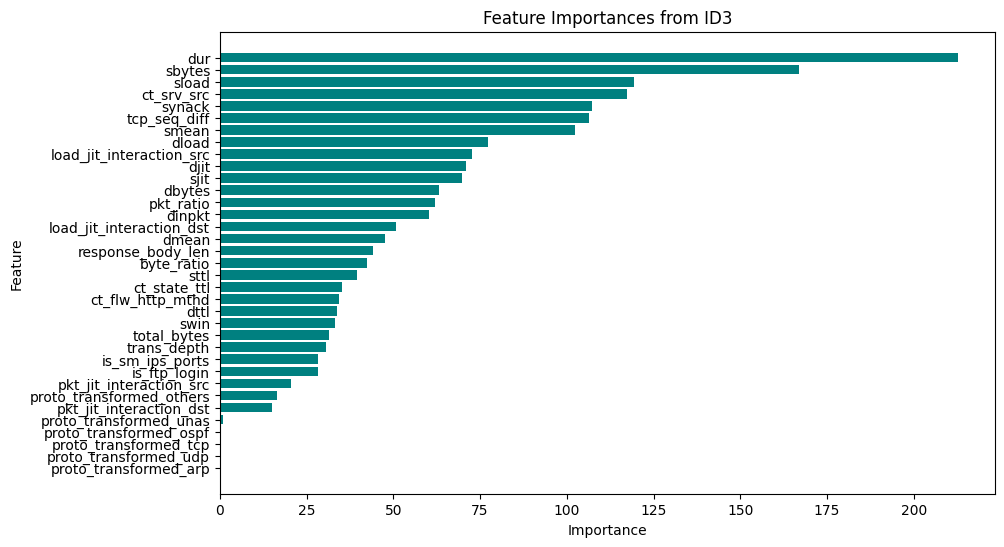

In [152]:
n_features = X_trainset.shape[1]
feature_importances = id3.extract_feature_importances(id3.tree, n_features)

# Map importances to feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_trainset.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

# Visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ID3')
plt.gca().invert_yaxis()  # Most important features at the top
plt.show()

In [153]:
dt_model = DecisionTreeClassifier(random_state=42,criterion='entropy')
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

# Train the models
dt_model.fit(X_trainset, y_trainset)
knn_model.fit(X_trainset, y_trainset)
nb_model.fit(X_trainset, y_trainset)

# # Make predictions
dt_pred = dt_model.predict(X_val)
knn_pred = knn_model.predict(X_val)
nb_pred = nb_model.predict(X_val)

# # Calculate accuracy and F1 score
dt_accuracy = accuracy_score(y_val, dt_pred)
knn_accuracy = accuracy_score(y_val, knn_pred)
nb_accuracy = accuracy_score(y_val, nb_pred)

dt_f1 = f1_score(y_val, dt_pred, average='macro')
knn_f1 = f1_score(y_val, knn_pred, average='macro')
nb_f1 = f1_score(y_val, nb_pred, average='macro')

# # Print out the results
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}, F1 Score: {dt_f1:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}, F1 Score: {knn_f1:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}, F1 Score: {nb_f1:.4f}")

Decision Tree Accuracy: 0.7853, F1 Score: 0.5452
KNN Accuracy: 0.6626, F1 Score: 0.3664
Naive Bayes Accuracy: 0.2670, F1 Score: 0.0909


## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [154]:
parameter_grid = {
    'max_depth': [None],
    'min_samples_split': [20,25,30, 35, 40],
    'min_information_gain': [1e-7]
}

import itertools

param_combinations = list(itertools.product(
    parameter_grid['max_depth'],
    parameter_grid['min_samples_split'],
    parameter_grid['min_information_gain']
))

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
best_f1 = -1
best_params = None

for idx, (max_depth, min_samples_split, min_info_gain) in enumerate(param_combinations):
    print(max_depth, min_samples_split, min_info_gain)
    f1_scores = []
    
    for train_index, val_index in kf.split(X_trainset):
        X_fold_train, X_fold_val = X_trainset.iloc[train_index], X_trainset.iloc[val_index]
        y_fold_train, y_fold_val = y_trainset.iloc[train_index], y_trainset.iloc[val_index]
        
        # Initialize the classifier with current parameters
        id3 = ID3Classifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_information_gain=min_info_gain
        )
        
        # Fit the model
        id3.fit(X_fold_train, y_fold_train)
        
        # Predict on validation fold
        predictions = id3.predict(X_fold_val)
        
        # Calculate F1 Macro Score
        score = f1_score(y_fold_val, predictions, average='macro')
        f1_scores.append(score)
    
    # Compute the average F1 score across folds
    avg_f1 = np.mean(f1_scores)
    print(avg_f1)

    print(f"Combination {idx+1}/{len(param_combinations)}: "
          f"max_depth={max_depth}, min_samples_split={min_samples_split}, "
          f"min_info_gain={min_info_gain} => F1 Macro={avg_f1:.4f}")
    
    # Update best parameters if current combination is better
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_params = {
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_information_gain': min_info_gain
        }
    

print("\nBest Parameters:")
print(best_params)
print(f"Best F1 Macro Score: {best_f1:.4f}")




None 20 1e-07
0.5510864437177156
Combination 1/5: max_depth=None, min_samples_split=20, min_info_gain=1e-07 => F1 Macro=0.5511
None 25 1e-07
0.5540714951412233
Combination 2/5: max_depth=None, min_samples_split=25, min_info_gain=1e-07 => F1 Macro=0.5541
None 30 1e-07
0.5528326283497835
Combination 3/5: max_depth=None, min_samples_split=30, min_info_gain=1e-07 => F1 Macro=0.5528
None 35 1e-07
0.5471836805665066
Combination 4/5: max_depth=None, min_samples_split=35, min_info_gain=1e-07 => F1 Macro=0.5472
None 40 1e-07
0.5421401819449692
Combination 5/5: max_depth=None, min_samples_split=40, min_info_gain=1e-07 => F1 Macro=0.5421

Best Parameters:
{'max_depth': None, 'min_samples_split': 25, 'min_information_gain': 1e-07}
Best F1 Macro Score: 0.5541


## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [155]:
id3 = ID3Classifier()
id3.fit(X_trainset,y_trainset)
predictions = id3.predict(data_test)

predictions_df = pd.DataFrame({
    'id': range(len(predictions)),  # Create incremental id starting from 0
    'attack_cat': predictions
})

# Export to CSV
predictions_df.to_csv('no_log_5_train.csv', index=False)

# Print confirmation
print("Predictions have been exported to 'predictions.csv'.")

Predictions have been exported to 'predictions.csv'.


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`